<a href="https://colab.research.google.com/github/Jordan73737/Data-Analysis-EV-Cars/blob/main/EV_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Greenwish Ltd needs a new fleet of sales rep cars for the UK.
Employees, shareholders, clients and customers all want electric v ehicles considering the
large millage done by reps every year.

Greenwish Ltd’sboard needs to make a decision, but it must be based on data.
Use the dataset 'evdataset.csv'supplied to perform your analysis.

1. Which make and model to buy?
2. Which factors/variables are relevant to the decision?
3. Show your conclusions with persuasive visuals

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

Saving 1ti2qpxhmmkw-evdataset.csv to 1ti2qpxhmmkw-evdataset.csv


In [3]:
df = pd.read_csv("1ti2qpxhmmkw-evdataset.csv")

In [4]:
df = df.dropna().reset_index(drop = True)

In [5]:
df.drop_duplicates()

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,1647,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,390,275,330,575,355,445,7.8,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,1493,Mercedes,https://ev-database.org/car/1493/Mercedes-EQB-...,330,235,280,480,300,375,6.2,...,46,470,4684,1834,1701,2829,2580,480,495,7
2,1229,Porsche,https://ev-database.org/car/1229/Porsche-Tayca...,400,305,350,580,385,470,3.2,...,46,1020,4963,1966,1381,2900,2880,575,366,4
3,1252,BMW,https://ev-database.org/car/1252/BMW-i4-eDrive40,445,340,390,670,440,540,5.7,...,54,730,4783,1852,1448,2856,2605,555,470,5
4,1534,Volkswagen,https://ev-database.org/car/1534/Volkswagen-ID...,440,320,380,660,415,520,7.9,...,55,570,4261,1809,1568,2771,2300,447,385,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1116,Porsche,https://ev-database.org/car/1116/Porsche-Tayca...,390,290,340,560,370,450,2.8,...,45,980,4963,1966,1378,2900,2870,575,366,4
190,1533,Volkswagen,https://ev-database.org/car/1533/Volkswagen-ID...,440,320,380,660,415,515,7.9,...,55,570,4261,1809,1568,2771,2280,420,385,4
191,1547,Citroen,https://ev-database.org/car/1547/Citroen-e-Ber...,210,140,170,295,170,220,11.7,...,27,310,4753,1921,1849,2975,2440,639,806,7
192,1492,Audi,https://ev-database.org/car/1492/Audi-Q4-Sport...,395,290,340,580,370,460,6.2,...,49,500,4588,1865,1614,2764,2715,575,535,5


In [6]:
df.drop(['Drive','City - Cold Weather','Highway - Cold Weather','Combined - Cold Weather','City - Mild Weather','Highway - Mild Weather','Combined - Mild Weather','Acceleration 0 - 100 km/h','Fastcharge Speed','Length','Width','Height','Wheelbase','Gross Vehicle Weight (GVWR)','Max. Payload','Cargo Volume', 'Total Torque', 'Total Power', 'Seats', 'id'], axis = 1, inplace = True)
df

,Make,link,Top Speed,Electric Range,Battery Capacity,Charge Power,Charge Speed
0,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,185,390,77.4,11.0,49
1,Mercedes,https://ev-database.org/car/1493/Mercedes-EQB-...,160,330,69.7,11.0,46
2,Porsche,https://ev-database.org/car/1229/Porsche-Tayca...,260,415,93.4,11.0,46
3,BMW,https://ev-database.org/car/1252/BMW-i4-eDrive40,190,470,83.9,11.0,54
4,Volkswagen,https://ev-database.org/car/1534/Volkswagen-ID...,160,450,82.0,11.0,55
...,...,...,...,...,...,...,...
189,Porsche,https://ev-database.org/car/1116/Porsche-Tayca...,260,400,93.4,11.0,45
190,Volkswagen,https://ev-database.org/car/1533/Volkswagen-ID...,160,450,82.0,11.0,55
191,Citroen,https://ev-database.org/car/1547/Citroen-e-Ber...,135,195,50.0,7.4,27
192,Audi,https://ev-database.org/car/1492/Audi-Q4-Sport...,180,400,82.0,11.0,49


In [7]:
df['Model'] = df.apply(lambda row: row.link.split("/")[-1], axis=1)
df

,Make,link,Top Speed,Electric Range,Battery Capacity,Charge Power,Charge Speed,Model
0,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,185,390,77.4,11.0,49,Genesis-GV60-Premium
1,Mercedes,https://ev-database.org/car/1493/Mercedes-EQB-...,160,330,69.7,11.0,46,Mercedes-EQB-350-4MATIC
2,Porsche,https://ev-database.org/car/1229/Porsche-Tayca...,260,415,93.4,11.0,46,Porsche-Taycan-Turbo
3,BMW,https://ev-database.org/car/1252/BMW-i4-eDrive40,190,470,83.9,11.0,54,BMW-i4-eDrive40
4,Volkswagen,https://ev-database.org/car/1534/Volkswagen-ID...,160,450,82.0,11.0,55,Volkswagen-ID3-Pro-S---5-Seats
...,...,...,...,...,...,...,...,...
189,Porsche,https://ev-database.org/car/1116/Porsche-Tayca...,260,400,93.4,11.0,45,Porsche-Taycan-Turbo-S
190,Volkswagen,https://ev-database.org/car/1533/Volkswagen-ID...,160,450,82.0,11.0,55,Volkswagen-ID3-Pro-S---4-Seats
191,Citroen,https://ev-database.org/car/1547/Citroen-e-Ber...,135,195,50.0,7.4,27,Citroen-e-Berlingo-XL-50-kWh
192,Audi,https://ev-database.org/car/1492/Audi-Q4-Sport...,180,400,82.0,11.0,49,Audi-Q4-Sportback-e-tron-50-quattro


In [8]:
sorted_df = df.sort_values(by=['Electric Range'])
sorted_df

,Make,link,Top Speed,Electric Range,Battery Capacity,Charge Power,Charge Speed,Model
13,Fiat,https://ev-database.org/car/1327/Fiat-500e-Hat...,135,135,23.8,11.0,59,Fiat-500e-Hatchback-24-kWh
121,Dacia,https://ev-database.org/car/1705/Dacia-Spring-...,125,155,26.8,6.6,35,Dacia-Spring-Electric
126,Mazda,https://ev-database.org/car/1680/Mazda-MX-30,140,170,35.5,11.0,53,Mazda-MX-30
59,Honda,https://ev-database.org/car/1233/Honda-e-Advance,145,170,35.5,6.6,33,Honda-e-Advance
186,Honda,https://ev-database.org/car/1171/Honda-e,145,170,35.5,6.6,33,Honda-e
...,...,...,...,...,...,...,...,...
50,Mercedes,https://ev-database.org/car/1537/Mercedes-EQS-...,250,565,120.0,11.0,49,Mercedes-EQS-AMG-53-4MATICplus
68,Mercedes,https://ev-database.org/car/1700/Mercedes-EQS-...,210,605,120.0,11.0,52,Mercedes-EQS-500-4MATIC
32,Mercedes,https://ev-database.org/car/1484/Mercedes-EQS-...,210,605,120.0,11.0,52,Mercedes-EQS-580-4MATIC
178,Mercedes,https://ev-database.org/car/1699/Mercedes-EQS-...,210,615,120.0,11.0,53,Mercedes-EQS-450-4MATIC


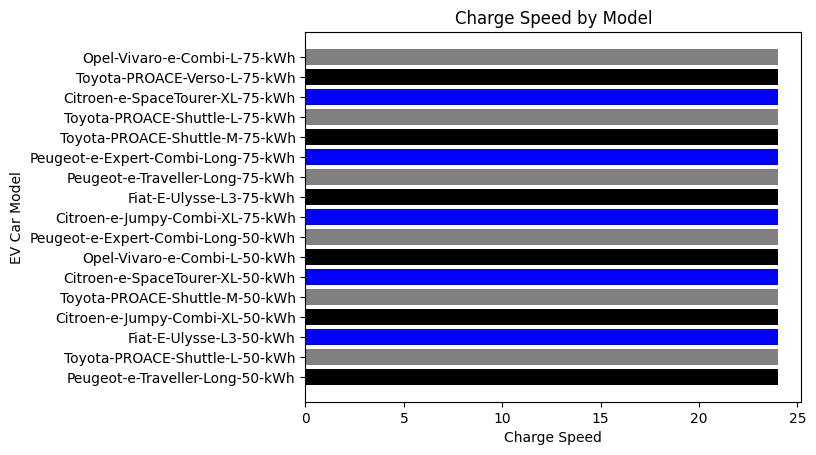

In [9]:
# Charge Speed by Model
below_50 = sorted_df[sorted_df['Charge Speed'] < 25]
plt.barh(below_50['Model'],below_50 ['Charge Speed'], color=['black', 'gray', 'blue'])
plt.xlabel('Charge Speed')
plt.ylabel('EV Car Model')
plt.title("Charge Speed by Model")
plt.show()

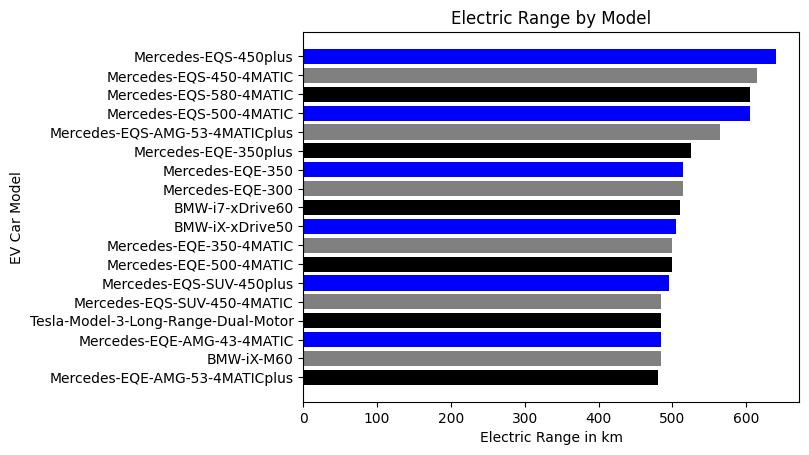

In [10]:
# Electric Range by Model
above_500 = sorted_df[sorted_df['Electric Range'] > 475]
plt.barh(above_500['Model'],above_500 ['Electric Range'], color=['black', 'gray', 'blue'])
plt.xlabel('Electric Range in km')
plt.ylabel('EV Car Model')
plt.title("Electric Range by Model")
plt.show()

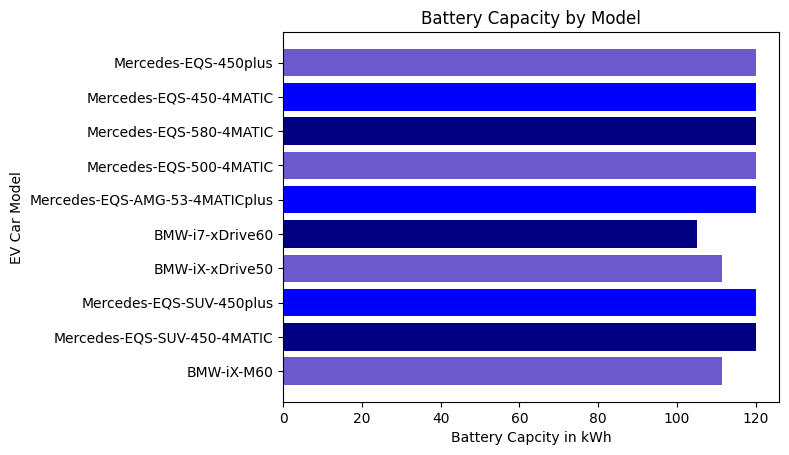

In [11]:
# Battery Capacity by Model
above_100 = sorted_df[sorted_df['Battery Capacity'] > 100]
plt.barh(above_100['Model'],above_100['Battery Capacity'],color=['slateblue', 'navy', 'blue'])
plt.xlabel('Battery Capcity in kWh')
plt.ylabel('EV Car Model')
plt.title("Battery Capacity by Model")
plt.show()

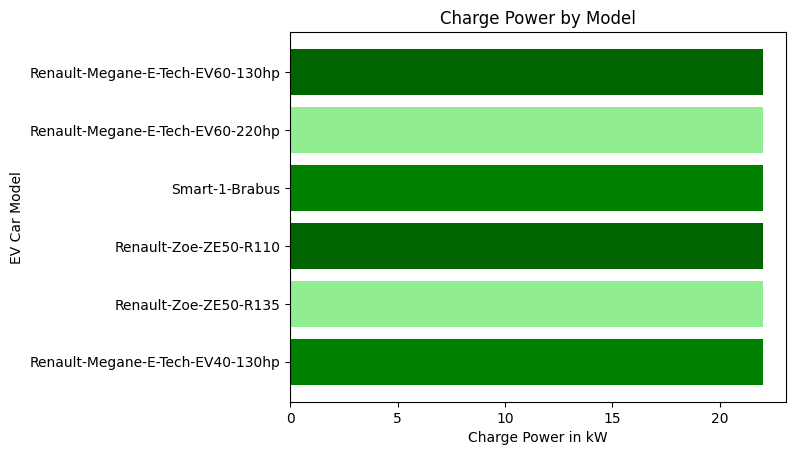

In [12]:
# Charge Power by Model
chargespeed = sorted_df[sorted_df['Charge Power'] == 22]
plt.barh(chargespeed['Model'],chargespeed ['Charge Power'], color=['green', 'lightgreen', 'darkgreen'])
plt.xlabel('Charge Power in kW')
plt.ylabel('EV Car Model')
plt.title("Charge Power by Model")
plt.show()

Text(0.5, 1.0, 'Charge Speed Average by Make')

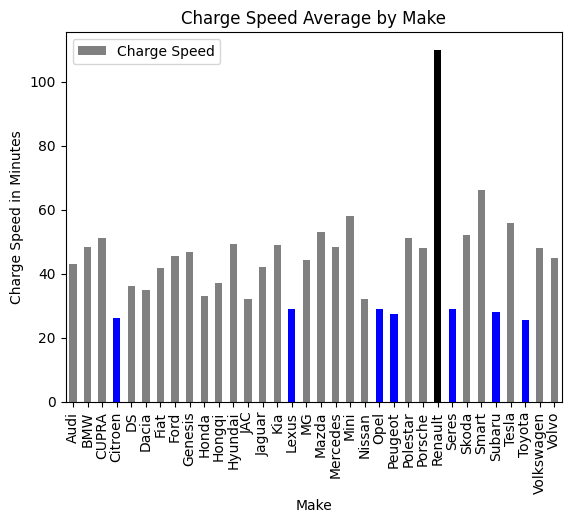

In [13]:
# Charge Speed by Car Make (for a general look at which car makes have good charge speeds, not nessecarily focusing on the most expensive models for each)
mean_df = df.groupby(['Make']).mean(['Charge Speed'])
colors = ["blue" if i < 30 else "black" if i > 80 else "gray" for i in mean_df['Charge Speed']]
mean_df.plot.bar(y='Charge Speed', color = colors)
plt.ylabel('Charge Speed in Minutes')
plt.title("Charge Speed Average by Make")

In [14]:
sorted_df = df.sort_values(by=['Electric Range'])
sorted_df

,Make,link,Top Speed,Electric Range,Battery Capacity,Charge Power,Charge Speed,Model
13,Fiat,https://ev-database.org/car/1327/Fiat-500e-Hat...,135,135,23.8,11.0,59,Fiat-500e-Hatchback-24-kWh
121,Dacia,https://ev-database.org/car/1705/Dacia-Spring-...,125,155,26.8,6.6,35,Dacia-Spring-Electric
126,Mazda,https://ev-database.org/car/1680/Mazda-MX-30,140,170,35.5,11.0,53,Mazda-MX-30
59,Honda,https://ev-database.org/car/1233/Honda-e-Advance,145,170,35.5,6.6,33,Honda-e-Advance
186,Honda,https://ev-database.org/car/1171/Honda-e,145,170,35.5,6.6,33,Honda-e
...,...,...,...,...,...,...,...,...
50,Mercedes,https://ev-database.org/car/1537/Mercedes-EQS-...,250,565,120.0,11.0,49,Mercedes-EQS-AMG-53-4MATICplus
68,Mercedes,https://ev-database.org/car/1700/Mercedes-EQS-...,210,605,120.0,11.0,52,Mercedes-EQS-500-4MATIC
32,Mercedes,https://ev-database.org/car/1484/Mercedes-EQS-...,210,605,120.0,11.0,52,Mercedes-EQS-580-4MATIC
178,Mercedes,https://ev-database.org/car/1699/Mercedes-EQS-...,210,615,120.0,11.0,53,Mercedes-EQS-450-4MATIC


Overall Rating By Model

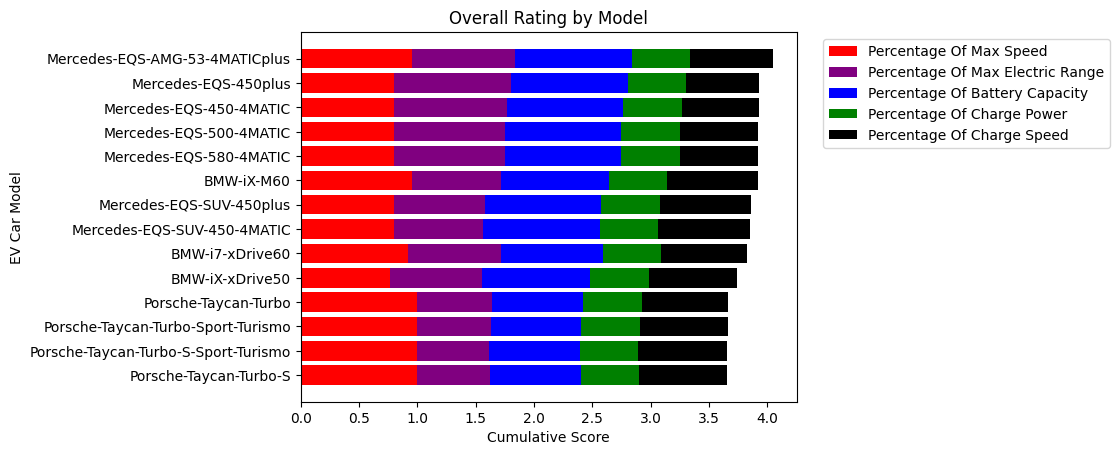

In [17]:
df_top_speed =  df['Top Speed'] / df['Top Speed'].max()
df['Percentage Of Max Speed'] = df_top_speed

df_Electric_range =  df['Electric Range'] / df['Electric Range'].max()
df['Percentage Of Max Electric Range'] = df_Electric_range

df_Battery_Capacity =  df['Battery Capacity'] / df['Battery Capacity'].max()
df['Percentage Of Battery Capacity'] = df_Battery_Capacity

df_Charge_Power =  df['Charge Power'] / df['Charge Power'].max()
df['Percentage Of Charge Power'] = df_Charge_Power

df_Charge_Speed = 1- (df['Charge Speed']-df['Charge Speed'].min()) / (df['Charge Speed'].max() - df['Charge Speed'].min())
df['Percentage Of Charge Speed'] = df_Charge_Speed

df['Cumulative Score'] = df['Percentage Of Max Speed'] + df['Percentage Of Max Electric Range'] +df['Percentage Of Battery Capacity'] + df['Percentage Of Charge Power'] + df['Percentage Of Charge Speed']

score_3 = df[df['Cumulative Score'] > 3.65]
score_3 = score_3.sort_values(by=['Cumulative Score'])
plt.barh(score_3['Model'],score_3['Percentage Of Max Speed'], color=['red'])
plt.barh(score_3['Model'],score_3['Percentage Of Max Electric Range'], left=score_3['Percentage Of Max Speed'], color=['purple'])
plt.barh(score_3['Model'],score_3['Percentage Of Battery Capacity'], left=score_3['Percentage Of Max Speed']+score_3['Percentage Of Max Electric Range'],color=['blue'])
plt.barh(score_3['Model'],score_3['Percentage Of Charge Power'], left=score_3['Percentage Of Max Speed']+score_3['Percentage Of Max Electric Range']+score_3['Percentage Of Battery Capacity'],color=['green'])
plt.barh(score_3['Model'],score_3['Percentage Of Charge Speed'], left=score_3['Percentage Of Max Speed']+score_3['Percentage Of Max Electric Range']+score_3['Percentage Of Battery Capacity']+score_3['Percentage Of Charge Power'],color=['black'])
plt.xlabel('Cumulative Score')
plt.ylabel('EV Car Model')
legend_list = ['Percentage Of Max Speed','Percentage Of Max Electric Range','Percentage Of Battery Capacity','Percentage Of Charge Power','Percentage Of Charge Speed']
plt.legend(legend_list,bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title("Overall Rating by Model")
plt.show()

Complementary correlation graph between Electric Range and Battery Capacity

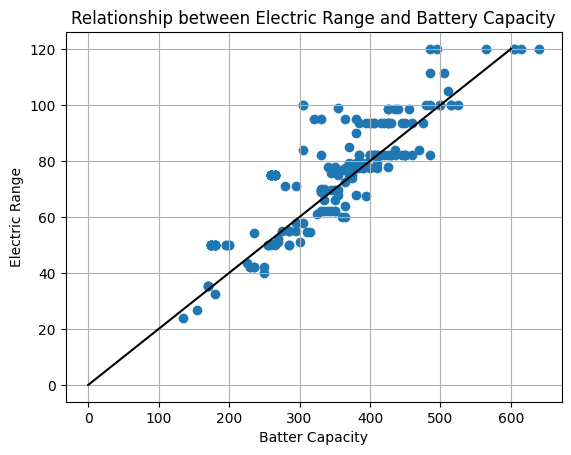

In [18]:
plt.scatter(df["Electric Range"], df["Battery Capacity"])
plt.title("Relationship between Electric Range and Battery Capacity")
plt.xlabel("Batter Capacity")
plt.ylabel("Electric Range")
plt.plot([0, 600], [0, 120], color= 'black')
plt.grid()

Conclusion:

As you can see, I have focused on what is usually considered the most pertinent car information for a potential fleet, client, etc.

The main data points to take away would be that:

- The Renault Megane E-Tech, Renault Zoe ZE50 cars along with the Smart-1 Brabus, have the commercial tier charge power capacity of 22kW.

- The Mercedes EQS models had the best battery capacity followed by the BMW ix models.

- The cars with the longest electric range were the Mercedes EQS 450 plus, followed by the Mercedes EQS 580 4MATIC, Mercedes EQS 450 4MATIC, Mercedes EQS 500 4MATIC, and Mercedes EQS AMG 53 4MATICplus.

To finalise, I would recommend using Mercedes EQS models as they objectively have the highest overall scores. However, their only drawback I suspect would be the price (which we do not have data on), as well as their mid-range charge speeds compared to car makes such as the citreon, lexus, toyota, nissan, opel, seres, peugeot and subaru.